In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, auc, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Set the random seeds for reproducibility 

np.random.seed(42)
tf.random.set_seed(42)

In [19]:
# Load the dataset

try:
    data_01 = pd.read_csv(f'feature_engineered_dataset.csv')
    print(f'Dataset loaded with shape: {data_01.shape}')
except Exception as e:
    print(f'Error loading dataset {e}')
    # If we can't load the dataset, create a samll dummpy data dataset for code demostration
    print('Creating dummy dataset for demostration purpose')
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples = 1000, n_feature = 20, n_classes = 2, random_state = 42)
    data_01 = pd.DataFrame(X, columns = [f'feature_{i}' for i in range(X.shape[1])])
    data_01['target'] =  y

Dataset loaded with shape: (10000, 37)


# Handling class imbalace issue

In [21]:
data_01.head()

,encoder__Undergraduate Major_Arts,encoder__Undergraduate Major_Business,encoder__Undergraduate Major_Economics,encoder__Undergraduate Major_Engineering,encoder__Undergraduate Major_Science,encoder__Current Job Title_Analyst,encoder__Current Job Title_Consultant,encoder__Current Job Title_Engineer,encoder__Current Job Title_Entrepreneur,encoder__Current Job Title_Manager,...,remainder__GRE/GMAT Score,remainder__Undergrad University Ranking,remainder__Entrepreneurial Interest,remainder__Networking Importance,remainder__Expected Post-MBA Salary,remainder__Gender,remainder__Has Management Experience,remainder__Location Preference (Post-MBA),remainder__Online vs. On-Campus MBA,remainder__Decided to Pursue MBA?
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.034780,-0.428223,0.936743,0.802780,0.636603,1.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.686449,1.090391,-0.648879,-0.549463,0.869308,1.0,1.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.597554,-0.966640,0.472659,-0.008565,-0.198866,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.065743,0.068778,-1.731744,-0.085837,-0.160710,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.331825,0.627904,1.555523,-0.240379,1.655018,0.0,0.0,0.0,1.0,1.0


In [23]:
data_01['remainder__Decided to Pursue MBA?'].value_counts()

remainder__Decided to Pursue MBA?
1.0    5907
0.0    4093
Name: count, dtype: int64

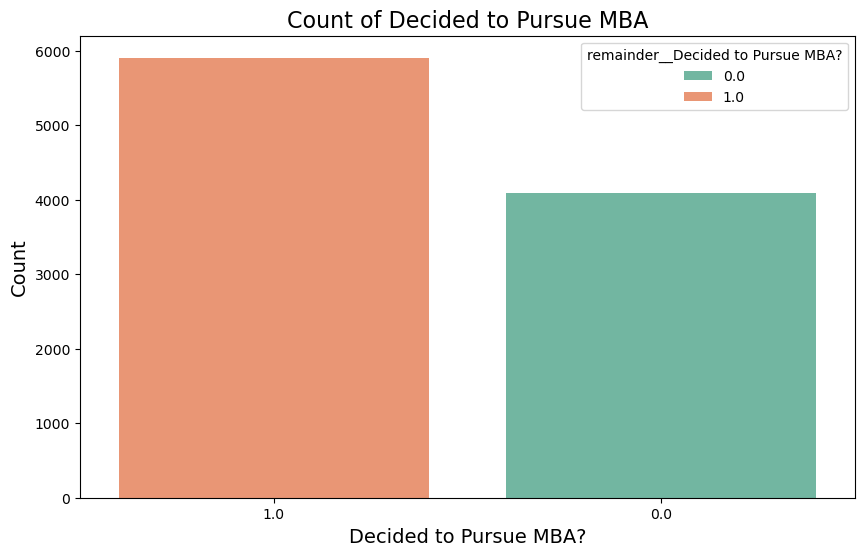

In [25]:
# Get value counts of the column
value_counts = data_01['remainder__Decided to Pursue MBA?'].value_counts()

# Create a count plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='remainder__Decided to Pursue MBA?',
              data=data_01,
              order=value_counts.index,
              hue = 'remainder__Decided to Pursue MBA?',
              palette='Set2')

# Add labels and title
plt.title('Count of Decided to Pursue MBA', fontsize=16)
plt.xlabel('Decided to Pursue MBA?', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

In [30]:
X = data_01.drop(columns = ['remainder__Decided to Pursue MBA?'], axis = 1)
y = data_01['remainder__Decided to Pursue MBA?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [32]:
# Ensure the class is balance

/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_1289/1156063315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='viridis')


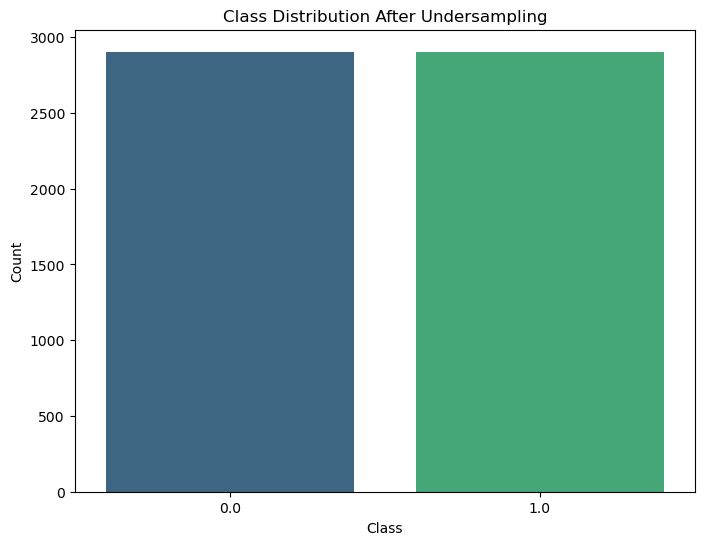

In [42]:
# Create a count plot to visualize the class distribution after undersampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled, palette='viridis')
plt.title('Class Distribution After Undersampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [40]:
y_train_resampled

1387    0.0
921     0.0
6167    0.0
1199    0.0
6506    0.0
       ... 
3313    1.0
8779    1.0
7493    1.0
5300    1.0
817     1.0
Name: remainder__Decided to Pursue MBA?, Length: 5808, dtype: float64

Dataset loaded: 10000 samples, 36 features
Target distribution: [4093 5907]
Original training set shape: [2904 4096]
Resampled training set shape: [2904 2904]
Epoch 1/200


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/73 ━━━━━━━━━━━━━━━━━━━━ 35s 488ms/step - accuracy: 0.5781 - loss: 0.7881
Epoch 1: val_loss improved from inf to 0.99007, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6159 - loss: 0.7738 - val_accuracy: 8.6059e-04 - val_loss: 0.9901
Epoch 2/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6094 - loss: 0.7673
Epoch 2: val_loss did not improve from 0.99007
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.6235 - loss: 0.7554 - val_accuracy: 0.0017 - val_loss: 0.9943
Epoch 3/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6562 - loss: 0.7554
Epoch 3: val_loss improved from 0.99007 to 0.97629, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.6231 - loss: 0.7469 - val_accuracy: 8.6059e-04 - val_loss: 0.9763
Epoch 4/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6094 - loss: 0.7365
Epoch 4: val_loss improved from 0.97629 to 0.96741, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6183 - loss: 0.7396 - val_accuracy: 0.0017 - val_loss: 0.9674
Epoch 5/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6406 - loss: 0.7216
Epoch 5: val_loss improved from 0.96741 to 0.96661, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.6301 - loss: 0.7294 - val_accuracy: 8.6059e-04 - val_loss: 0.9666
Epoch 6/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.7291
Epoch 6: val_loss did not improve from 0.96661
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.6270 - loss: 0.7247 - val_accuracy: 0.0026 - val_loss: 0.9668
Epoch 7/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6406 - loss: 0.7311
Epoch 7: val_loss did not improve from 0.96661
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.6263 - loss: 0.7201 - val_accuracy: 0.0069 - val_loss: 0.9744
Epoch 8/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6094 - loss: 0.7347
Epoch 8: val_loss improved from 0.96661 to 0.96146, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.6250 - loss: 0.7145 - val_accuracy: 0.0077 - val_loss: 0.9615
Epoch 9/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6406 - loss: 0.7284
Epoch 9: val_loss improved from 0.96146 to 0.95688, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.6277 - loss: 0.7085 - val_accuracy: 0.0077 - val_loss: 0.9569
Epoch 10/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6562 - loss: 0.7017
Epoch 10: val_loss improved from 0.95688 to 0.94937, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.6273 - loss: 0.7033 - val_accuracy: 0.0095 - val_loss: 0.9494
Epoch 11/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6094 - loss: 0.7287
Epoch 11: val_loss did not improve from 0.94937
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.6282 - loss: 0.7019 - val_accuracy: 0.0077 - val_loss: 0.9649
Epoch 12/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6094 - loss: 0.7034
Epoch 12: val_loss improved from 0.94937 to 0.94855, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6273 - loss: 0.6954 - val_accuracy: 0.0164 - val_loss: 0.9486
Epoch 13/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.7113
Epoch 13: val_loss improved from 0.94855 to 0.94209, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.6319 - loss: 0.6899 - val_accuracy: 0.0293 - val_loss: 0.9421
Epoch 14/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6562 - loss: 0.6755
Epoch 14: val_loss did not improve from 0.94209
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.6322 - loss: 0.6857 - val_accuracy: 0.0448 - val_loss: 0.9450
Epoch 15/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5938 - loss: 0.7105
Epoch 15: val_loss did not improve from 0.94209
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.6369 - loss: 0.6873 - val_accuracy: 0.0542 - val_loss: 0.9429
Epoch 16/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6250 - loss: 0.7125
Epoch 16: val_loss did not improve from 0.94209
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.6393 - loss: 0.6798 - val_accuracy: 0.0585 - val_loss: 0.9443
Epoch 17/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.6936
Epoch 17: val_loss improved from 0.94209 to 

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6364 - loss: 0.6817 - val_accuracy: 0.0628 - val_loss: 0.9420
Epoch 18/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.6945
Epoch 18: val_loss improved from 0.94198 to 0.93606, saving model to best_model.h5


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6351 - loss: 0.6781 - val_accuracy: 0.0775 - val_loss: 0.9361
Epoch 19/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5625 - loss: 0.6804
Epoch 19: val_loss did not improve from 0.93606
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.6351 - loss: 0.6751 - val_accuracy: 0.0688 - val_loss: 0.9423
Epoch 20/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6094 - loss: 0.7223
Epoch 20: val_loss did not improve from 0.93606
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.6298 - loss: 0.6759 - val_accuracy: 0.0559 - val_loss: 0.9647
Epoch 21/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6094 - loss: 0.6920
Epoch 21: val_loss did not improve from 0.93606
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.6407 - loss: 0.6701 - val_accuracy: 0.0602 - val_loss: 0.9532
Epoch 22/200
 1/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6406 - loss: 0.6662
Epoch 22: val_loss did not improve from 0.9360

Training history plot saved as 'training_history.png'
Model saved as 'mba_prediction_model.h5'


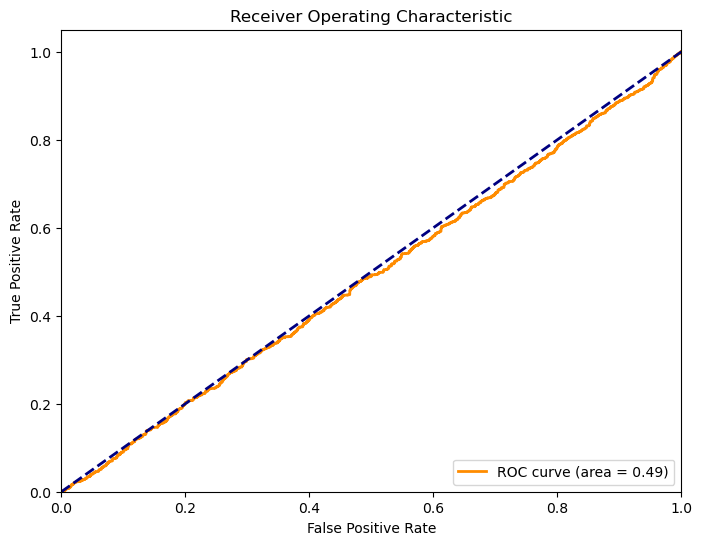

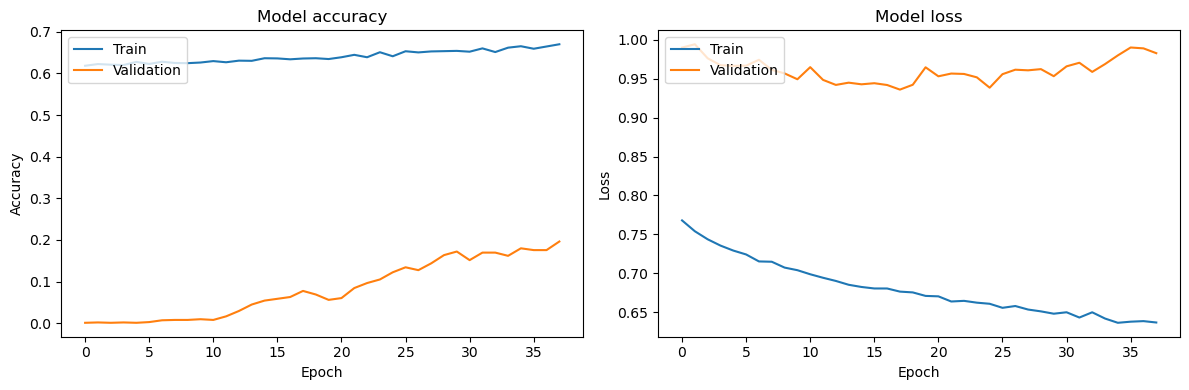

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

def load_and_prepare_data(data_path):
    """
    Load data_01 dataset and prepare X and y with the correct column name
    """
    # Load dataset
    data_01 = pd.read_csv(f'feature_engineered_dataset.csv')
    
    # Separate features and target with the updated column name
    X = data_01.drop(columns = ['remainder__Decided to Pursue MBA?'], axis = 1)
    y = data_01['remainder__Decided to Pursue MBA?']
    
    return X, y

def create_model(input_dim):
    """
    Create a neural network model with the tuned hyperparameters
    """
    # Extract the tuned hyperparameters
    n_layers = 2
    units_1 = 130
    units_2 = 225
    dropout_1 = 0.4937534117605381
    dropout_2 = 0.2642473811836487
    activation = 'relu'
    l1_reg = 2.4200204603657365e-07
    l2_reg = 0.00044960134343524774
    learning_rate = 0.0007863640307519507
    
    # Create regularizer
    regularizer = l1_l2(l1=l1_reg, l2=l2_reg)
    
    # Initialize model
    model = Sequential()
    
    # Add first hidden layer
    model.add(Dense(units_1, activation=activation, 
                   kernel_regularizer=regularizer,
                   input_dim=input_dim))
    model.add(Dropout(dropout_1))
    
    # Add second hidden layer
    model.add(Dense(units_2, activation=activation,
                   kernel_regularizer=regularizer))
    model.add(Dropout(dropout_2))
    
    # Add output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Configure optimizer
    optimizer = Adam(learning_rate=learning_rate)
    
    # Compile model
    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model

def train_evaluate_model(X, y, test_size=0.3, random_state=101):
    """
    Train and evaluate the model using pre-scaled data and undersampling
    """
    # Split data with specified test_size and random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size=test_size, 
                                                      random_state=random_state)
    
    # Apply random undersampling to the training data
    undersampler = RandomUnderSampler(random_state=42)
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)
    
    print(f"Original training set shape: {np.bincount(y_train)}")
    print(f"Resampled training set shape: {np.bincount(y_train_resampled)}")
    
    # Create model
    input_dim = X_train_resampled.shape[1]
    model = create_model(input_dim)
    
    # Train model
    batch_size = 64
    epochs = 200  # Can be adjusted, with early stopping
    
    # Add early stopping to prevent overfitting
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True
    )
    
    # Add model checkpoint to save best model
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
        'best_model.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
    
    # Train the model on the resampled data
    history = model.fit(
        X_train_resampled, y_train_resampled,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.2,
        callbacks=[early_stopping, model_checkpoint],
        verbose=1
    )
    
    # Make predictions
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)
    
    # Evaluate model
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    cm = confusion_matrix(y_test, y_pred)
    
    # Print evaluation metrics
    print("\nModel Evaluation on Test Set:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {auc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    
    return model, history, X_test, y_test

def predict_new_data(model, new_data):
    """
    Make predictions on new data (assuming data is already scaled)
    """
    # Make prediction
    predictions = model.predict(new_data)
    binary_predictions = (predictions > 0.5).astype(int).reshape(-1)
    
    return binary_predictions, predictions

def plot_roc_curve(model, X_test, y_test):
    """
    Plot ROC curve for the model
    """
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    
    # Predict probabilities
    y_pred_prob = model.predict(X_test).ravel()
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('roc_curve.png')
    print("ROC curve saved as 'roc_curve.png'")

# Main function to run the model
def main(data_path='data_01.csv'):
    # Load and prepare data
    X, y = load_and_prepare_data(data_path)
    
    print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features")
    print(f"Target distribution: {np.bincount(y)}")
    
    # Train and evaluate model
    model, history, X_test, y_test = train_evaluate_model(X, y)
    
    print("Model training completed")
    
    # Plot ROC curve
    try:
        plot_roc_curve(model, X_test, y_test)
    except ImportError:
        print("Could not plot ROC curve due to missing dependencies")
    
    # Plot training history
    try:
        import matplotlib.pyplot as plt
        
        plt.figure(figsize=(12, 4))
        
        # Plot training & validation accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Model accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        
        # Plot training & validation loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        
        plt.tight_layout()
        plt.savefig('training_history.png')
        print("Training history plot saved as 'training_history.png'")
    except ImportError:
        print("Matplotlib not available for plotting")
    
    return model

# Execute the main function
if __name__ == "__main__":
    model = main('data_01.csv')
    
    # Save the model
    model.save('mba_prediction_model.h5')
    print("Model saved as 'mba_prediction_model.h5'")
    
    # Example of how to load the model later
    # loaded_model = tf.keras.models.load_model('mba_prediction_model.h5')